In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('./salary.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,job_state,company_txt,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,0,1,53,91,72.0,NM,Tecolote Research\n,0,47
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,0,1,63,112,87.5,MD,University of Maryland Medical System\n,0,36
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,-1,0,1,80,90,85.0,FL,KnowBe4\n,1,10
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oak Ridge National Laboratory, National Renewa...",0,1,56,97,76.5,WA,PNNL\n,1,55
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,"Commerce Signals, Cardlytics, Yodlee",0,1,86,143,114.5,NY,Affinity Solutions\n,1,22


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'company_txt', 'same_state', 'age'],
      dtype='object')

In [6]:
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    for pos in ('sr', 'senior', 'lead', 'principal'):
        if pos in title.lower():
            return 'senior'
    for pos in ('jr', 'junior'):
        if pos in title.lower():
            return 'junior'
    return 'na'

In [7]:
df['simple_title'] = df['Job Title'].apply(simplify_title)
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.simple_title.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: simple_title, dtype: int64

In [9]:
df.seniority.value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [10]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
AZ      9
MO      9
AL      8
GA      6
KY      6
DE      6
MI      6
CT      5
IA      5
NE      4
OR      4
LA      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [11]:
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
# df.drop(['Competitors'], axis=1, inplace=True)

In [12]:
df['num_competitors']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [13]:
# Hourly wage to annual wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [14]:
df[df.hourly == 1][['min_salary', 'max_salary', 'hourly']]

,min_salary,max_salary,hourly
165,34,48,1
177,42,68,1
197,36,50,1
202,42,68,1
210,30,50,1
246,34,48,1
271,42,68,1
337,36,50,1
345,48,78,1
357,42,68,1


In [15]:
# Remove newline char from company_txt
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))
df.company_txt

s Pharmaceuticals
392                     Advanced BioScience Laboratories
393                                    Reynolds American
394                                Echo Global Logistics
395                                            Glassdoor
396                                                 Esri
397                                             Assurant
398                                          Caterpillar
399                                   Equity Residential
400                                                  F&G
401                                                 PNNL
402                      GreatAmerica Financial Services
403                                     Acceleron Pharma
404                                           Kronos Bio
405                                  AmeriHealth Caritas
406                        Strategic Employment Partners
407                                                 PNNL
408                          Catholic Health Initiatives
409          

In [16]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,num_competitors
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,1.0,74.719677,128.149596,100.626011,0.557951,46.591644,1.053908
std,0.801210,497.183763,0.177034,0.0,30.980593,45.220324,38.855948,0.496965,53.778815,1.384239
min,-1.000000,-1.000000,0.000000,1.0,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000
25%,3.300000,1939.000000,0.000000,1.0,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000
50%,3.700000,1988.000000,0.000000,1.0,69.500000,124.000000,97.500000,1.000000,24.000000,0.000000
75%,4.000000,2007.000000,0.000000,1.0,91.000000,155.000000,122.500000,1.000000,59.000000,3.000000
max,5.000000,2019.000000,1.000000,1.0,202.000000,306.000000,254.000000,1.000000,276.000000,4.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'company_txt', 'same_state', 'age', 'simple_title',
       'seniority', 'num_competitors'],
      dtype='object')

<AxesSubplot:>

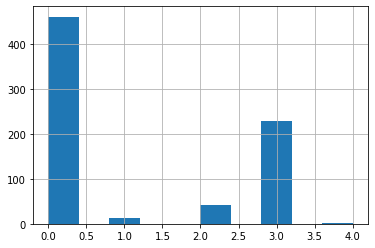

In [16]:
df.num_competitors.hist()

<AxesSubplot:>

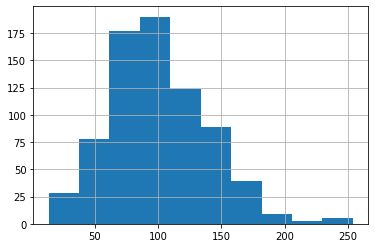

In [17]:
df.avg_salary.hist()

<AxesSubplot:>

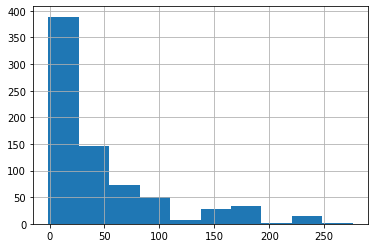

In [18]:
df.age.hist()

<AxesSubplot:>

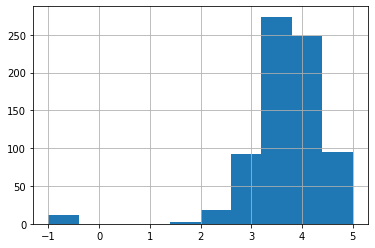

In [19]:
df.Rating.hist()

<AxesSubplot:>

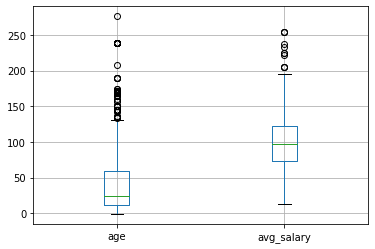

In [20]:
df.boxplot(column=['age', 'avg_salary'])

<AxesSubplot:>

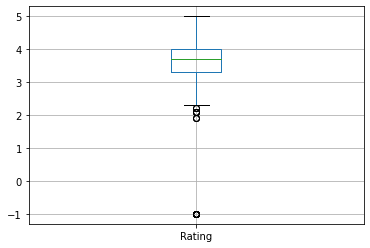

In [21]:
df.boxplot(column=['Rating'])

In [18]:
corr = df[['age', 'avg_salary', 'Rating', 'num_competitors']].corr()

<AxesSubplot:>

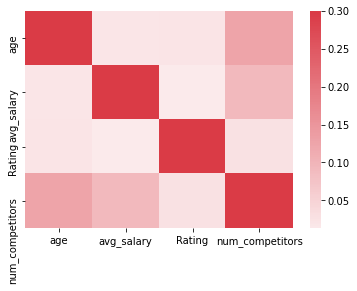

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=0.3, center=0, cmap=cmap)

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'company_txt', 'same_state', 'age', 'simple_title',
       'seniority', 'num_competitors'],
      dtype='object')

In [21]:
df_cat = df[['Location', 'Headquarters', 'Size', 'job_state', 'simple_title']]

In [22]:
df_cat.head()

,Location,Headquarters,Size,job_state,simple_title
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,NM,data scientist
1,"Linthicum, MD","Baltimore, MD",10000+ employees,MD,data scientist
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,FL,data scientist
3,"Richland, WA","Richland, WA",1001 to 5000 employees,WA,data scientist
4,"New York, NY","New York, NY",51 to 200 employees,NY,data scientist


Graph for Location: total = 200


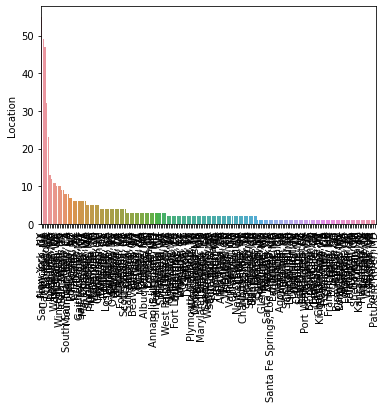

Graph for Headquarters: total = 198


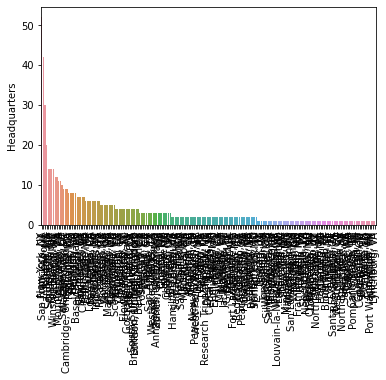

Graph for Size: total = 9


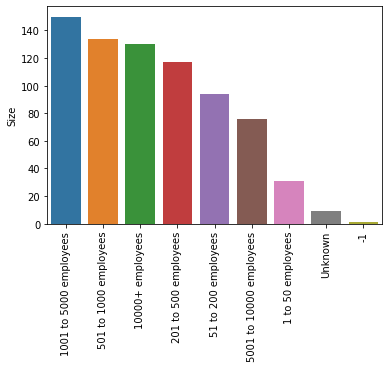

Graph for job_state: total = 37


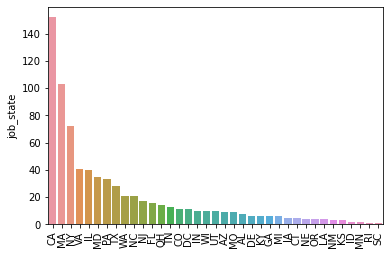

Graph for simple_title: total = 7


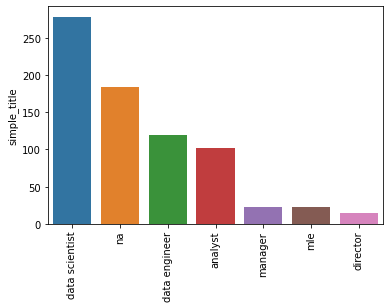

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f'Graph for {i}: total = {len(cat_num)}')
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,job_state,company_txt,same_state,age,simple_title,seniority,num_competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,NM,Tecolote Research,0,47,data scientist,na,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,MD,University of Maryland Medical System,0,36,data scientist,na,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,85.0,FL,KnowBe4,1,10,data scientist,na,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,76.5,WA,PNNL,1,55,data scientist,na,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,114.5,NY,Affinity Solutions,1,22,data scientist,na,3


In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'company_txt', 'same_state', 'age', 'simple_title',
       'seniority', 'num_competitors'],
      dtype='object')

In [25]:
pd.pivot_table(df, index=['simple_title'], values='avg_salary')

,avg_salary
simple_title,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [26]:
pd.pivot_table(df, index=['simple_title', 'seniority'], values='avg_salary')


avg_salary
simple_title   seniority            
analyst        junior      53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [27]:
pd.pivot_table(df, index=['job_state', 'simple_title'], values='avg_salary')

avg_salary
job_state simple_title              
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        analyst          85.250000
          data engineer   129.540000
          data scientist  142.522059
          manager          80.611111
          mle             177.300000
          na               99.907407
CO        analyst          29.500000
          data engineer    99.000000
          data scientist  108.666667
          mle             100.500000
          na               31.500000
CT        data scientist   84.000000
          na               62.500000
DC        analyst          63.500000
          data engineer    85.000000
          data scientist  149.000000
DE        na               27.500000
FL        analyst          47.500000
          data engineer    91.833333
          data scientist   97.357143
GA        data scientist   81.333333
          na               80.000000
IA        analyst          43.000000
          data engineer   102.833333
ID        analyst          56.250000
IL        analyst          66.500000
          data engineer    96.125000
          data scientist  117.233333
          director        221.750000
          mle             133.000000
          na               57.166667
IN        data engineer   114.500000
          data scientist   84.500000
          na               69.000000
KS        mle              87.000000
KY        data scientist   84.000000
          na              103.500000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
MA        analyst          59.125000
          data engineer   107.291667
          data scientist  113.750000
          director        117.833333
          manager          71.900000
          na              107.478261
MD        analyst          80.666667
          data engineer   109.000000
          data scientist  109.115385
          na               88.750000
MI        data scientist  106.625000
          manager          87.500000
MN        analyst          76.000000
          data engineer    95.000000
MO        analyst          61.000000
          data scientist  127.666667
          manager          40.500000
          na               72.333333
NC        data engineer   104.250000
          data scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        analyst          83.583333
          data engineer   112.000000
          data scientist  106.875000
          director        161.500000
          manager         109.500000
          na               82.500000
NM        data scientist   74.333333
NY        analyst          65.607143
          data engineer    86.375000
          data scientist  115.250000
          mle             125.000000
          na               81.583333
OH        analyst          53.875000
          data scientist  105.285714
          na               91.166667
OR        data engineer    73.000000
          data scientist   98.500000
PA        analyst          62.750000
          data engineer    91.500000
          data scientist  113.333333
          manager         109.666667
          mle             120.500000
          na               76.062500
RI        analyst         100.000000
SC        na               60.500000
TN        analyst          13.500000
          data engineer   100.950000
          data scientist   96.000000
TX        data engineer   113.062500
          data scientist  100.730769
          na               41.285714
UT        analyst          54.750000
          data engineer   100.333333
          data scientist  140.500000
VA        analyst          71.583333
          data engineer    96.900000
          data scientist  108.416667
          mle              87.

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'company_txt', 'same_state', 'age', 'simple_title',
       'seniority', 'num_competitors'],
      dtype='object')

In [34]:
df_pivot = df[['Rating', 'Location', 'Headquarters', 'Size', 'Revenue', 'Competitors', 'avg_salary', 'job_state', 'age', 'hourly', 'employer_provided', 'simple_title', 'seniority', 'num_competitors']]

for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))
    print('\n\n')

              78.200000
Lyndhurst, NJ                       78.000000
Pella, IA                           77.500000
Hamilton, NJ                        77.500000
Hampton, VA                         77.500000
Richland, WA                        76.650000
Carle Place, NY                     76.500000
Albuquerque, NM                     74.333333
Clearwater, FL                      73.000000
Corvallis, OR                       73.000000
Patuxent River, MD                  72.500000
Blue Bell, PA                       72.500000
Winter Park, FL                     71.500000
Alexandria, VA                      71.000000
Portsmouth, VA                      70.500000
Columbia, MO                        70.500000
Lafayette, LA                       70.500000
Ithaca, NY                          70.000000
Baltimore, MD                       69.666667
Bedford, MA                         69.500000
Tampa, FL                           69.166667
San Antonio, TX                     67.666667
Birmingham

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [29]:
df.to_csv('analysed.csv', index=False)